Use stochastic gradient descent to arrange 12 points on the unit
sphere minimizing the sum of the reciprocals of the squared distances
between distinct points.  (The loss function in this case is a sum
over **pairs** of points.)



## Plotting points in 3-D



Let&rsquo;s use `mpl_toolkits` to enable the `projection='3d'` option in
`plt.axes`.



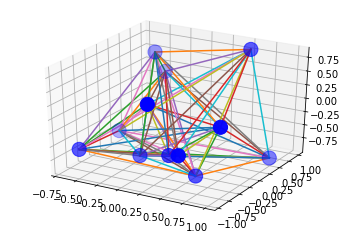

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

N = 12

def plot(points):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(N):
        for j in range(i+1,N):
            p = np.array([points[i], points[j]])
            ax.plot(p[:,0], p[:,1], p[:,2])
    ax.scatter(points[:,0], points[:,1], points[:,2], c='b', s=200)
    plt.show()

plot( np.random.uniform(-1,1,size=(N,3)) )

## Normalizing to the sphere



Use `np.linalg.norm` to normalize the points to the unit sphere.



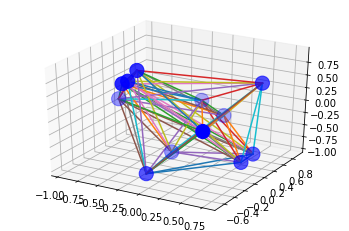

In [3]:
def normalize(points):
    return points / np.linalg.norm(points, axis=1)[:, np.newaxis]

def random_points():
    return normalize( np.random.uniform(-1,1,size=(N,3)) )

plot( random_points() )

## Our cost function



In [11]:
#Assume that nothing is repeated
def listofpairs(lst):
    pairs = []
    
    while len(lst) > 0:
        
        for i in range(1, len(lst)):
            
            pair = [lst[0], lst[i - 1]]
            pairs.append([lst[0], lst[i]])
            lst = lst[1:len(lst)-1]
            
    return pairs
    

def cost(points):
    s = 0
    

1
2
3
4


We can get an idea of the distribution of our cost function by
sampling random configurations.



In [1]:
plt.hist( [cost( random_points() ) for _ in range(100)] )
plt.show()

Let&rsquo;s &ldquo;zoom in&rdquo; on the left hand side.



In [1]:
samples = np.array([cost( random_points() ) for _ in range(10000)])
samples = samples[ samples < 300 ]
plt.hist( samples )
plt.show()

Can we get much lower?



## SGD ftw



Now it is your turn to compute the gradient.



In [1]:
def sgd_step(points, eta):
    g = np.zeros((len(points),3))

    # pick a random pair of points
    i, j = np.random.choice( range(len(points)), size = 2, replace=False )

    raise Exception('You compute grad ( 1 / distance(points[i],points[j])**2 )')

    return normalize( points - eta * g )

We guess an appropriate decay for the learning rate.



In [1]:
def sgd(points, steps):
    for t in range(steps): 
        eta = 0.02 * (0.9999 ** (t / N))
        points = sgd_step(points, eta)
        print( cost(points) )
    return points

points = random_points()
points = sgd( points, 10000 )
plot(points)

What does this plot look like?

